In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pre_match_info = pd.read_csv("../Datasets/pre_match_information.csv")

In [3]:
pre_match_info.sample(10)

,matchid,hometeamname,awayteamname,ishometeam,isawayteam,isstaff,country,id,officialname,officialsurname,jerseyname,shortname,goalscored,cleansheet,matchplayed,suspendedifbooked,role
938,2024484,England,Germany,True,False,False,England,250088246,Marcus,Rashford,Rashford,Rashford,0.0,NaN,Rashford,False,Forward
1561,2024455,Hungary,Portugal,False,True,False,Portugal,95417,NaN,Pepe,Pepe,Pepe,0.0,NaN,Pepe,False,Defender
2786,2024453,Spain,Sweden,False,True,False,Sweden,250040953,Kristoffer,Olsson,Olsson,Olsson,0.0,NaN,Olsson,False,Midfield
3310,2024446,Ukraine,Austria,True,False,False,Ukraine,250119185,Illia,Zabarnyi,Zabarnyi,Zabarnyi,0.0,NaN,Zabarnyi,False,Defender
35,2024442,Austria,North Macedonia,True,False,True,Germany,250075632,Mike,Steverding,NaN,NaN,NaN,NaN,NaN,NaN,PH
1669,2024491,Italy,England,True,False,False,Italy,250020885,Leonardo,Spinazzola,SPINAZZOLA,Spinazzola,0.0,NaN,Spinazzola,False,Defender
1288,2024481,France,Switzerland,True,False,False,France,250024983,Kurt,Zouma,Zouma,Zouma,0.0,NaN,Zouma,False,Defender
3236,2024457,Turkey,Wales,True,False,False,Turkey,62309,NaN,Burak Yilmaz,BURAK,Burak Yilmaz,0.0,NaN,Burak Yilmaz,False,Forward
211,2024479,Belgium,Portugal,False,True,False,Portugal,70098,NaN,João Moutinho,J. Moutinho,João Moutinho,0.0,NaN,João Moutinho,False,Midfield
842,2024451,England,Croatia,False,True,False,Croatia,250024176,Mislav,Oršic,Oršic,Oršic,0.0,NaN,Oršic,False,Midfield


In [4]:
pre_match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matchid            3667 non-null   int64  
 1   hometeamname       3667 non-null   object 
 2   awayteamname       3667 non-null   object 
 3   ishometeam         3667 non-null   bool   
 4   isawayteam         3667 non-null   bool   
 5   isstaff            3667 non-null   bool   
 6   country            3469 non-null   object 
 7   id                 3667 non-null   int64  
 8   officialname       3275 non-null   object 
 9   officialsurname    3537 non-null   object 
 10  jerseyname         2648 non-null   object 
 11  shortname          2648 non-null   object 
 12  goalscored         2331 non-null   float64
 13  cleansheet         317 non-null    float64
 14  matchplayed        2648 non-null   object 
 15  suspendedifbooked  2648 non-null   object 
 16  role               3667 

In [5]:
pre_match_info.describe()

,matchid,id,goalscored,cleansheet
count,3.667000e+03,3.667000e+03,2331.000000,317.000000
mean,2.024466e+06,1.873084e+08,0.111111,0.258675
std,1.465699e+01,1.062253e+08,0.438600,0.730850
min,2.024441e+06,1.050000e+02,0.000000,0.000000
25%,2.024453e+06,1.501361e+08,0.000000,0.000000
50%,2.024466e+06,2.500504e+08,0.000000,0.000000
75%,2.024478e+06,2.500806e+08,0.000000,0.000000
max,2.024491e+06,2.501560e+08,5.000000,5.000000


In [6]:
pre_match_info.isnull().sum()

matchid                 0
hometeamname            0
awayteamname            0
ishometeam              0
isawayteam              0
isstaff                 0
country               198
id                      0
officialname          392
officialsurname       130
jerseyname           1019
shortname            1019
goalscored           1336
cleansheet           3350
matchplayed          1019
suspendedifbooked    1019
role                    0
dtype: int64

In [7]:
pre_match_info['goalscored'].fillna(0, inplace=True)
pre_match_info['goalscored'] = pre_match_info['goalscored'].astype(int)

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\498110928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pre_match_info['goalscored'].fillna(0, inplace=True)


In [8]:
pre_match_info['country'] = pre_match_info.apply(lambda x: x['hometeamname'] if x['ishometeam'] else x['awayteamname'], axis=1)

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\2535730158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='goalscored', y='officialsurname', palette='viridis')


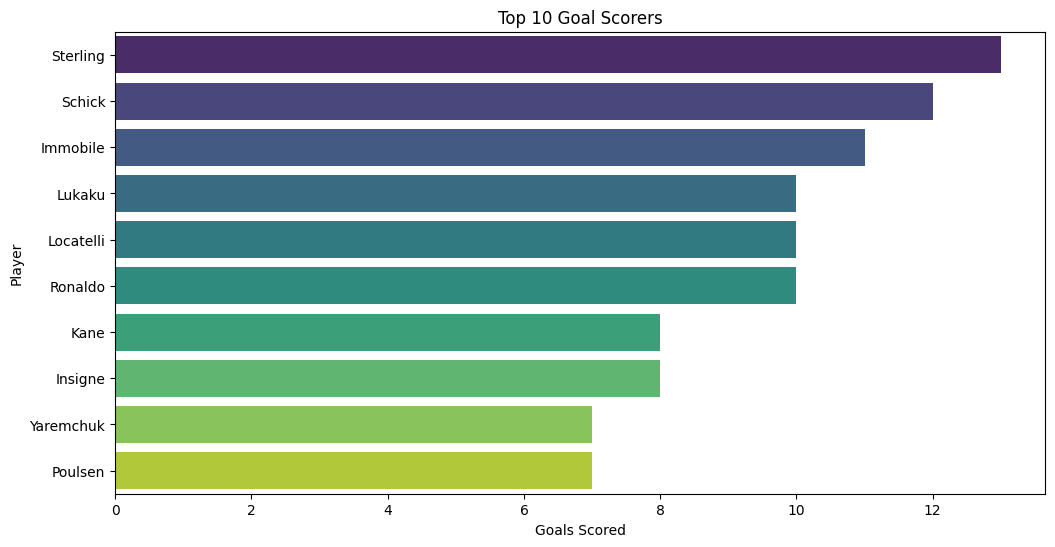

In [9]:
top_scorers = pre_match_info[pre_match_info['goalscored'] > 0].groupby('officialsurname')['goalscored'].sum().reset_index().sort_values(by='goalscored', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='goalscored', y='officialsurname', palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals Scored')
plt.ylabel('Player')
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\1421323762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_performance, x='goalscored', y='country', palette='viridis')


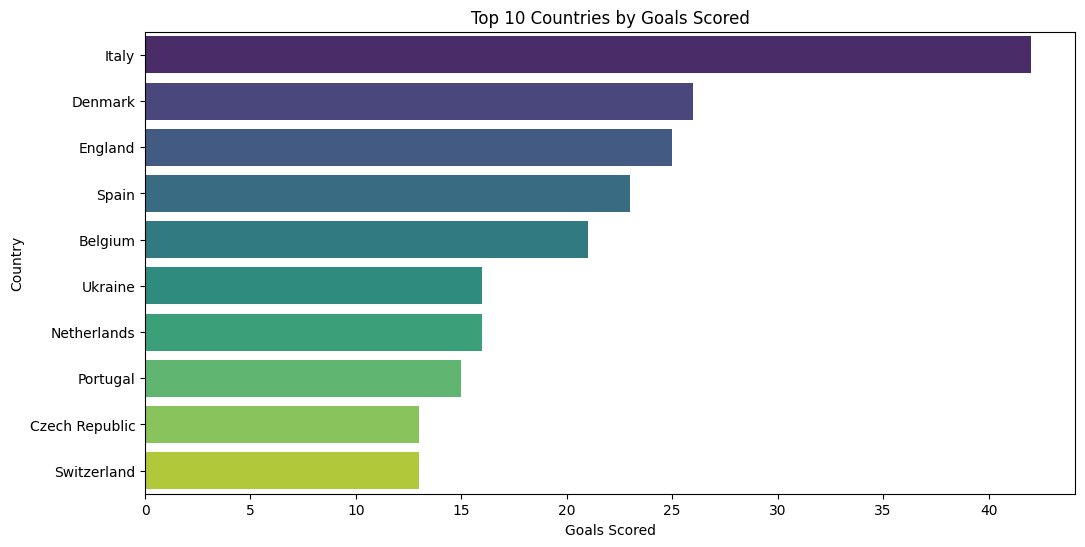

In [10]:
country_performance = pre_match_info.groupby('country')['goalscored'].sum().reset_index().sort_values(by='goalscored', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_performance, x='goalscored', y='country', palette='viridis')
plt.title('Top 10 Countries by Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Country')
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\1899336373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goal_by_role, x='goalscored', y='role', palette='Set2')


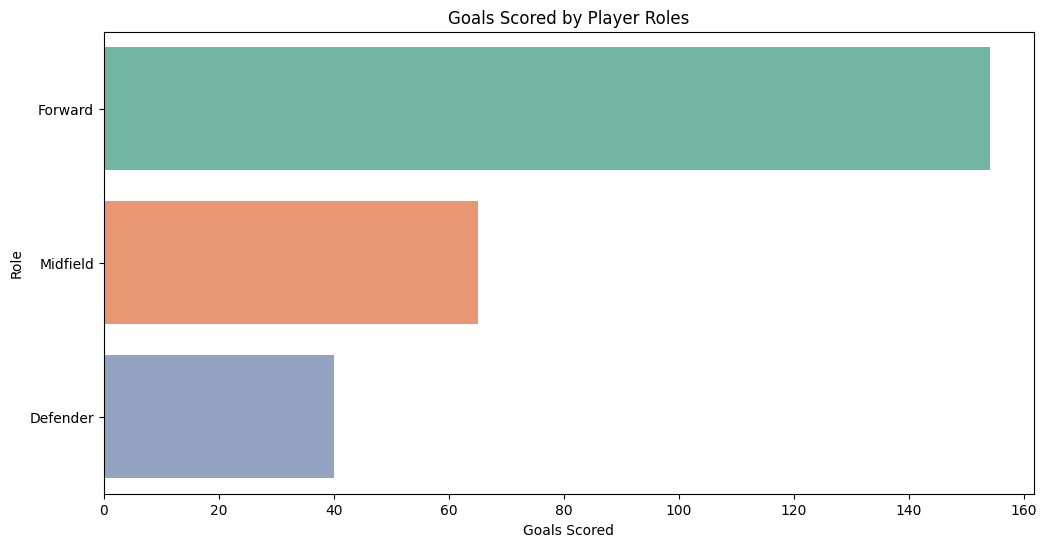

In [11]:
goal_by_role = pre_match_info[pre_match_info['goalscored'] > 0].groupby('role')['goalscored'].sum().reset_index().sort_values('goalscored', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=goal_by_role, x='goalscored', y='role', palette='Set2')
plt.title('Goals Scored by Player Roles')
plt.xlabel('Goals Scored')
plt.ylabel('Role')
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\3878661381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=teams_at_risk, x='count', y='country', palette='viridis')


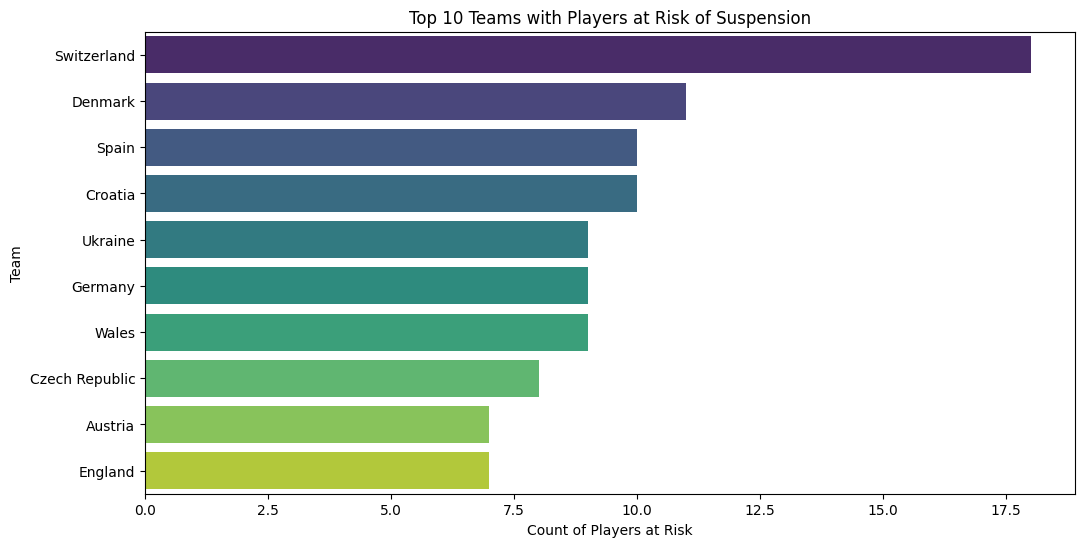

In [12]:
teams_at_risk = pre_match_info[pre_match_info['suspendedifbooked'] == True].groupby('country').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=teams_at_risk, x='count', y='country', palette='viridis')
plt.title('Top 10 Teams with Players at Risk of Suspension')
plt.xlabel('Count of Players at Risk')
plt.ylabel('Team')
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_18884\3502418835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_at_risk, x='count', y='officialsurname', palette='viridis')


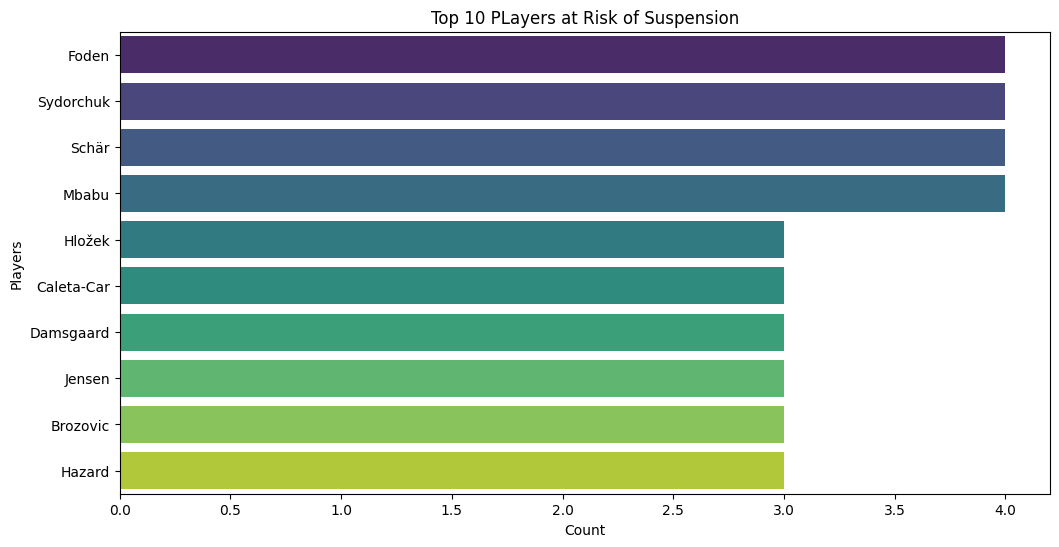

In [13]:
players_at_risk = pre_match_info[pre_match_info['suspendedifbooked'] == True].groupby('officialsurname').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=players_at_risk, x='count', y='officialsurname', palette='viridis')
plt.title('Top 10 PLayers at Risk of Suspension')
plt.xlabel('Count')
plt.ylabel('Players')
plt.show()